In [1]:
import numpy as np

# 1) Loading Files

In [2]:
from os import listdir, path

It is expected to exist two directories containing two distinct image sets

The compressed files containing theses image sets can be found in: ...

The extracted figures were organized in such a way that pictures are in subdirectory 'pictures' and their respective groud truths are in the subdirectory 'gts'.

Each image set was obtained in different conditions:
 - A - two conditions: A1) normal soil [1-18], and A2) compacted soil [19-40];
 - B (new set) - not calibrated images

In [3]:
dirA = '../IC2017_DATA/suborbitalRS_40_check/'
dirB = '../IC2017_DATA/newimages_lcrs2/'

In [4]:
path_pics = []
path_gts = []
for d in [dirA, dirB]:
    path_pics.extend(sorted([path.join(d, 'pictures', file) for file in listdir(d + 'pictures')]))
    path_gts.extend(sorted([path.join(d, 'gts', file) for file in listdir(d + 'gts')]))

In [5]:
# checking paths
path_pics[:5], path_gts[:5]

(['../IC2017_DATA/suborbitalRS_40_check/pictures/img01.png',
  '../IC2017_DATA/suborbitalRS_40_check/pictures/img02.png',
  '../IC2017_DATA/suborbitalRS_40_check/pictures/img03.png',
  '../IC2017_DATA/suborbitalRS_40_check/pictures/img04.png',
  '../IC2017_DATA/suborbitalRS_40_check/pictures/img05.png'],
 ['../IC2017_DATA/suborbitalRS_40_check/gts/gt01.png',
  '../IC2017_DATA/suborbitalRS_40_check/gts/gt02.png',
  '../IC2017_DATA/suborbitalRS_40_check/gts/gt03.png',
  '../IC2017_DATA/suborbitalRS_40_check/gts/gt04.png',
  '../IC2017_DATA/suborbitalRS_40_check/gts/gt05.png'])

# 2) Cheking the images

## 2.1) visualizing image types

In [6]:
import matplotlib.pyplot as plt
from skimage.io import imread

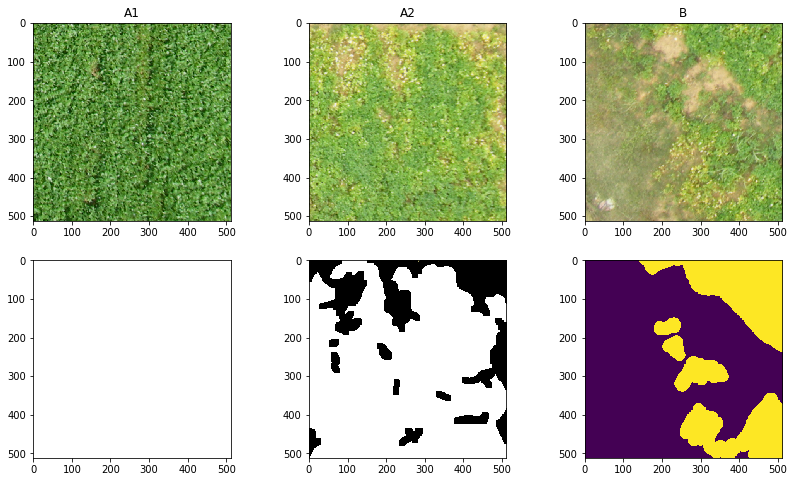

In [7]:
# pictures on the top and their respective gts below
plt.figure(figsize=(14,8))
types = [('A1', 0), ('A2', 19), ('B', 40 + 1)]

for i, (name, num) in enumerate(types):
    plt.subplot(2, 3, i + 1)
    plt.title(name)
    plt.imshow(imread(path_pics[num]))
    plt.subplot(2, 3, i + 1 + 3)
    plt.imshow(imread(path_gts[num]))

## 2.2) checking images sizes

In [8]:
invalid_images = set()

print('Testing pictures:')
for i, path in enumerate(path_pics):
    pic = imread(path)
    a, b, c = pic.shape
    if (a, b) != (512, 512):
        invalid_images.add(i)
        print('> picture %s has wrong resolution (%d, %d).' % (path, a, b))
print('Done.\n')


print('Testing gts:')
for i, path in enumerate(path_gts):
    gt = imread(path)
    a, b = gt.shape[:2]
    if (a, b) != (512, 512):
        invalid_images.add(i)
        print('> gt %s has wrong resolution (%d, %d).' % (path, a, b))
print('Done.\n')

Testing pictures:
Done.

Testing gts:
> gt ../IC2017_DATA/suborbitalRS_40_check/gts/gt12.png has wrong resolution (510, 512).
> gt ../IC2017_DATA/suborbitalRS_40_check/gts/gt21.png has wrong resolution (506, 512).
> gt ../IC2017_DATA/suborbitalRS_40_check/gts/gt31.png has wrong resolution (510, 512).
Done.



> Some images will have to be removed!

In [9]:
invalid_images

{11, 20, 30}

## 2.3) Checking num of channels

In [10]:
# checking num of channels
print('Testing pictures:')
for path in path_pics:
    pic = imread(path)
    c = pic.shape[2]
    if c != 4:
        print('> picture %s has different num of channels (%d).' % (path, c))

print()
print('Testing gts:')
for path in path_gts:
    gt = imread(path)
    if len(gt.shape) > 2:
        c = gt.shape[2]
        print('> gt %s has extra channels (%d).' % (path, c))

Testing pictures:
> picture ../IC2017_DATA/newimages_lcrs2/pictures/deg21.png has different num of channels (3).

Testing gts:
> gt ../IC2017_DATA/suborbitalRS_40_check/gts/gt01.png has extra channels (4).
> gt ../IC2017_DATA/suborbitalRS_40_check/gts/gt02.png has extra channels (4).
> gt ../IC2017_DATA/suborbitalRS_40_check/gts/gt03.png has extra channels (4).
> gt ../IC2017_DATA/suborbitalRS_40_check/gts/gt04.png has extra channels (4).
> gt ../IC2017_DATA/suborbitalRS_40_check/gts/gt05.png has extra channels (4).
> gt ../IC2017_DATA/suborbitalRS_40_check/gts/gt07.png has extra channels (4).
> gt ../IC2017_DATA/suborbitalRS_40_check/gts/gt09.png has extra channels (4).
> gt ../IC2017_DATA/suborbitalRS_40_check/gts/gt10.png has extra channels (4).
> gt ../IC2017_DATA/suborbitalRS_40_check/gts/gt11.png has extra channels (4).
> gt ../IC2017_DATA/suborbitalRS_40_check/gts/gt12.png has extra channels (4).
> gt ../IC2017_DATA/suborbitalRS_40_check/gts/gt14.png has extra channels (4).
> gt

> Having different numbers of channels is not a huge problem. But it means extra care will be necessary when reading the images to make all them fit a standard.

In [11]:
import pandas as pd

In [12]:
paths = pd.DataFrame({
    'num' : range(len(path_pics)),
    'pic' : path_pics,
    'gt'  : path_gts,
})

In [13]:
paths.drop(labels = paths.index[paths.num.isin(invalid_images)], inplace = True)

In [14]:
paths.to_csv('../IC2017_DATA/valid_images.csv', index = False)

In [15]:
paths

num                                                pic  \
0     0  ../IC2017_DATA/suborbitalRS_40_check/pictures/...   
1     1  ../IC2017_DATA/suborbitalRS_40_check/pictures/...   
2     2  ../IC2017_DATA/suborbitalRS_40_check/pictures/...   
3     3  ../IC2017_DATA/suborbitalRS_40_check/pictures/...   
4     4  ../IC2017_DATA/suborbitalRS_40_check/pictures/...   
5     5  ../IC2017_DATA/suborbitalRS_40_check/pictures/...   
6     6  ../IC2017_DATA/suborbitalRS_40_check/pictures/...   
7     7  ../IC2017_DATA/suborbitalRS_40_check/pictures/...   
8     8  ../IC2017_DATA/suborbitalRS_40_check/pictures/...   
9     9  ../IC2017_DATA/suborbitalRS_40_check/pictures/...   
10   10  ../IC2017_DATA/suborbitalRS_40_check/pictures/...   
12   12  ../IC2017_DATA/suborbitalRS_40_check/pictures/...   
13   13  ../IC2017_DATA/suborbitalRS_40_check/pictures/...   
14   14  ../IC2017_DATA/suborbitalRS_40_check/pictures/...   
15   15  ../IC2017_DATA/suborbitalRS_40_check/pictures/...   
16   16  ../IC2017_DATA/suborbitalRS_40_check/pictures/...   
17   17  ../IC2017_DATA/suborbitalRS_40_check/pictures/...   
18   18  ../IC2017_DATA/suborbitalRS_40_check/pictures/...   
19   19  ../IC2017_DATA/suborbitalRS_40_check/pictures/...   
21   21  ../IC2017_DATA/suborbitalRS_40_check/pictures/...   
22   22  ../IC2017_DATA/suborbitalRS_40_check/pictures/...   
23   23  ../IC2017_DATA/suborbitalRS_40_check/pictures/...   
24   24  ../IC2017_DATA/suborbitalRS_40_check/pictures/...   
25   25  ../IC2017_DATA/suborbitalRS_40_check/pictures/...   
26   26  ../IC2017_DATA/suborbitalRS_40_check/pictures/...   
27   27  ../IC2017_DATA/suborbitalRS_40_check/pictures/...   
28   28  ../IC2017_DATA/suborbitalRS_40_check/pictures/...   
29   29  ../IC2017_DATA/suborbitalRS_40_check/pictures/...   
31   31  ../IC2017_DATA/suborbitalRS_40_check/pictures/...   
32   32  ../IC2017_DATA/suborbitalRS_40_check/pictures/...   
33   33  ../IC2017_DATA/suborbitalRS_40_check/pictures/...   
34   34  ../IC2017_DATA/suborbitalRS_40_check/pictures/...   
35   35  ../IC2017_DATA/suborbitalRS_40_check/pictures/...   
36   36  ../IC2017_DATA/suborbitalRS_40_check/pictures/...   
37   37  ../IC2017_DATA/suborbitalRS_40_check/pictures/...   
38   38  ../IC2017_DATA/suborbitalRS_40_check/pictures/...   
39   39  ../IC2017_DATA/suborbitalRS_40_check/pictures/...   
40   40  ../IC2017_DATA/newimages_lcrs2/pictures/deg00.png   
41   41  ../IC2017_DATA/newimages_lcrs2/pictures/deg01.png   
42   42  ../IC2017_DATA/newimages_lcrs2/pictures/deg02.png   
43   43  ../IC2017_DATA/newimages_lcrs2/pictures/deg03.png   
44   44  ../IC2017_DATA/newimages_lcrs2/pictures/deg04.png   
45   45  ../IC2017_DATA/newimages_lcrs2/pictures/deg05.png   
46   46  ../IC2017_DATA/newimages_lcrs2/pictures/deg06.png   
47   47  ../IC2017_DATA/newimages_lcrs2/pictures/deg07.png   
48   48  ../IC2017_DATA/newimages_lcrs2/pictures/deg08.png   
49   49  ../IC2017_DATA/newimages_lcrs2/pictures/deg09.png   
50   50  ../IC2017_DATA/newimages_lcrs2/pictures/deg10.png   
51   51  ../IC2017_DATA/newimages_lcrs2/pictures/deg11.png   
52   52  ../IC2017_DATA/newimages_lcrs2/pictures/deg12.png   
53   53  ../IC2017_DATA/newimages_lcrs2/pictures/deg13.png   
54   54  ../IC2017_DATA/newimages_lcrs2/pictures/deg14.png   
55   55  ../IC2017_DATA/newimages_lcrs2/pictures/deg15.png   
56   56  ../IC2017_DATA/newimages_lcrs2/pictures/deg16.png   
57   57  ../IC2017_DATA/newimages_lcrs2/pictures/deg17.png   
58   58  ../IC2017_DATA/newimages_lcrs2/pictures/deg18.png   
59   59  ../IC2017_DATA/newimages_lcrs2/pictures/deg19.png   
60   60  ../IC2017_DATA/newimages_lcrs2/pictures/deg20.png   
61   61  ../IC2017_DATA/newimages_lcrs2/pictures/deg21.png   

                                                   gt  
0   ../IC2017_DATA/suborbitalRS_40_check/gts/gt01.png  
1   ../IC2017_DATA/suborbitalRS_40_check/gts/gt02.png  
2   ../IC2017_DATA/suborbitalRS_40_check/gts/gt03.png  
3   ../IC2017_DATA/suborbitalRS_40_check/gts/gt04.png  
4  

# 3) Rotating image

In [16]:
pic = imread(path_pics[19])

In [17]:
from scipy.ndimage.interpolation import rotate

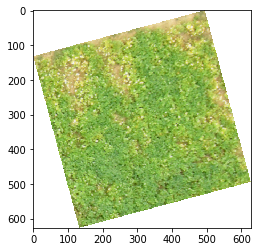

In [18]:
rot = rotate(pic, 15)
plt.imshow(rot)

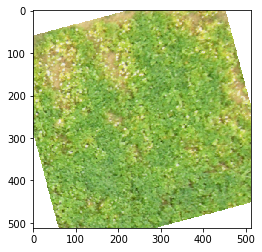

In [19]:
rot = rotate(pic, 15, reshape=False)
plt.imshow(rot)


## Finding a fixed size to rotate

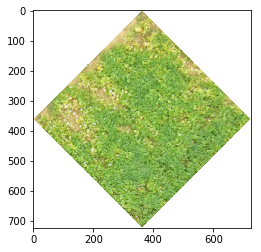

In [20]:
rot = rotate(pic, 45)
plt.imshow(rot)

In [21]:
rot.shape

(724, 724, 4)

In [22]:
delta = (724 - 512) / 2
delta

106.0

In [23]:
padded = np.pad(pic, ((106, 106), (106, 106), (0, 0)), mode = 'constant')

In [24]:
padded.shape

(724, 724, 4)

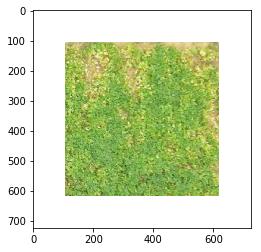

In [25]:
plt.imshow(padded)

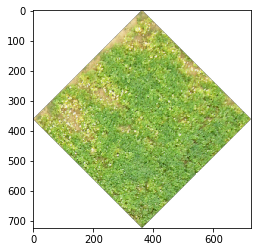

In [26]:
rot = rotate(padded, 45, reshape = False)
plt.imshow(rot)

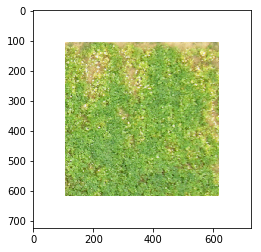

In [27]:
rot = rotate(rot, -45, reshape = False)
plt.imshow(rot)

In [28]:
rot[106: 512 + 106, 106: 512 + 106]

array([[[169, 154, 116, 184],
        [218, 198, 147, 223],
        [219, 198, 145, 229],
        ...,
        [190, 183, 120, 229],
        [191, 179, 118, 223],
        [148, 137,  91, 184]],

       [[219, 199, 143, 223],
        [252, 229, 163, 255],
        [227, 204, 145, 254],
        ...,
        [200, 188, 125, 254],
        [221, 206, 136, 255],
        [191, 178, 118, 223]],

       [[218, 199, 136, 229],
        [225, 204, 141, 254],
        [224, 199, 142, 253],
        ...,
        [198, 184, 123, 253],
        [200, 186, 123, 254],
        [194, 180, 119, 229]],

       ...,

       [[127, 153,  69, 229],
        [123, 152,  64, 254],
        [104, 131,  49, 253],
        ...,
        [163, 181,  69, 253],
        [177, 194,  86, 254],
        [185, 199, 103, 229]],

       [[126, 149,  72, 223],
        [141, 168,  82, 255],
        [110, 132,  58, 254],
        ...,
        [165, 179,  76, 254],
        [202, 218, 116, 255],
        [187, 199, 118, 223]],

       [[100

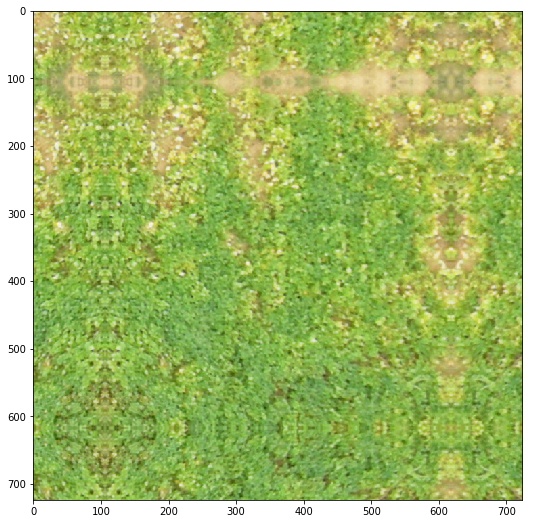

In [29]:
padded = np.pad(pic, ((106, 106), (106, 106), (0, 0)), mode = 'reflect')
plt.figure(figsize = (9,9))
plt.imshow(padded)

In [30]:
724 % 16

4

In [31]:
delta2 = (1024 - 724) / 2
delta2

150.0

In [32]:
padded = np.pad(pic, ((256, 256), (256, 256), (0, 0)), mode = 'constant')

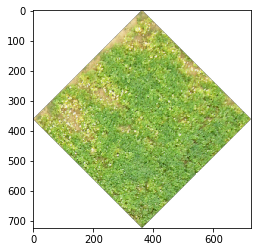

In [33]:
rot = rotate(padded, 45, reshape = False)
plt.imshow(rot[150 : 150 + 724, 150 : 150 + 724])

## 3.1) Finding ways to rotate back

### 3.1.1) Rotating an index matrix first

In [34]:
import numpy as np

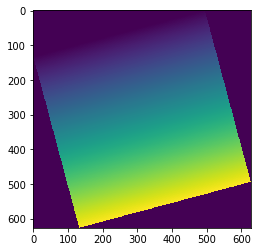

In [35]:
a = np.arange(512*512).reshape((512, 512))
rot = rotate(a, 15)
plt.imshow(rot)

In [36]:
np.isin(np.arange(512*512), np.unique(rot)).mean()

0.5687141418457031

> This won't work. When the matrix is rotate the the integer indices are modified by the interpolation

### 3.1.2) Just rotating back, by finding the right numbers

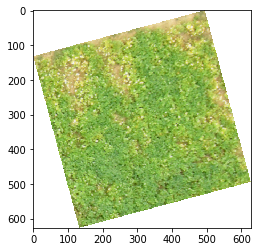

In [37]:
rot = rotate(pic, 15)
plt.imshow(rot)

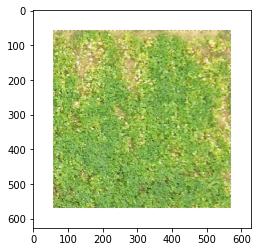

In [38]:
rot2 = rotate(rot, -15, reshape = False)
plt.imshow(rot2)

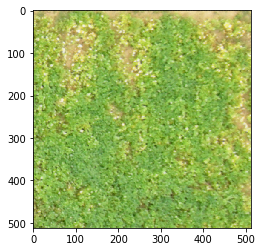

In [39]:
delta = (rot2.shape[0] - 512) // 2
plt.imshow(rot2[delta:delta+512, delta:delta+512])

> Seems to work well.

## 3.2) Checking is mirroring is acceptable

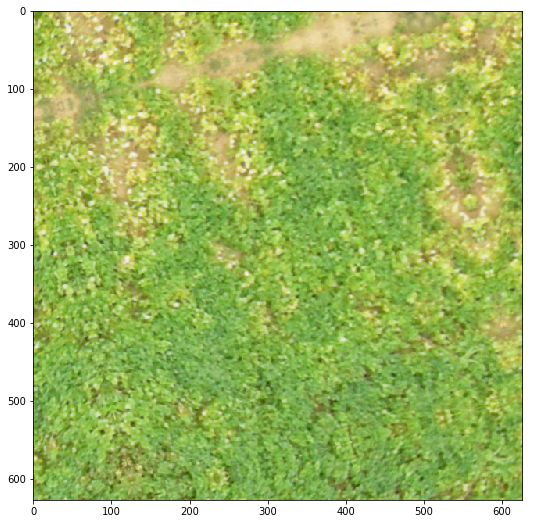

In [40]:
# mirrored
plt.figure(figsize=(9,9))
rot3 = rotate(pic, 15, mode = 'mirror')
plt.imshow(rot3)

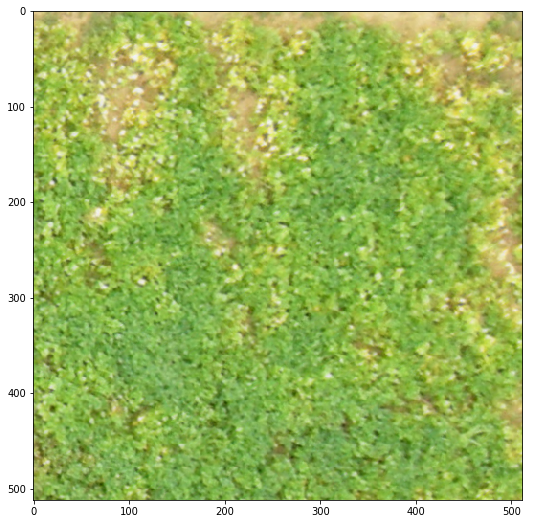

In [41]:
# original
plt.figure(figsize=(9,9))
plt.imshow(pic)

# 4) Filters

In [42]:
from scipy.signal import convolve2d

## 4.1) Motion blur

In [43]:
n = 9
kernel = np.zeros((n, n), int)
kernel[n // 2, :] = 1
kernel = kernel / kernel.sum()
kernel

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.11111111, 0.11111111, 0.11111111, 0.11111111, 0.11111111,
        0.11111111, 0.11111111, 0.11111111, 0.11111111],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],


In [44]:
out = np.zeros((512, 512, 3), int)

In [45]:
for c in range(3):
    out[:,:,c] = convolve2d(pic[:,:,c], kernel, mode = 'same', boundary = 'symm')

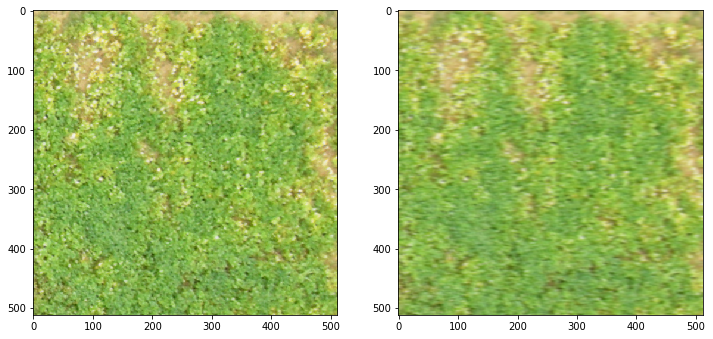

In [46]:
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.imshow(pic)

plt.subplot(1, 2, 2)
plt.imshow(out)

## 4.2) Gaussian

In [47]:
n = 5
kernel = np.ones((n, n), int)
# kernel[n // 2, :] = 1
kernel = kernel / kernel.sum()
kernel

array([[0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04]])

In [48]:
out = np.zeros((512, 512, 3), int)

In [49]:
for c in range(3):
    out[:,:,c] = convolve2d(pic[:,:,c], kernel, mode = 'same', boundary = 'symm')

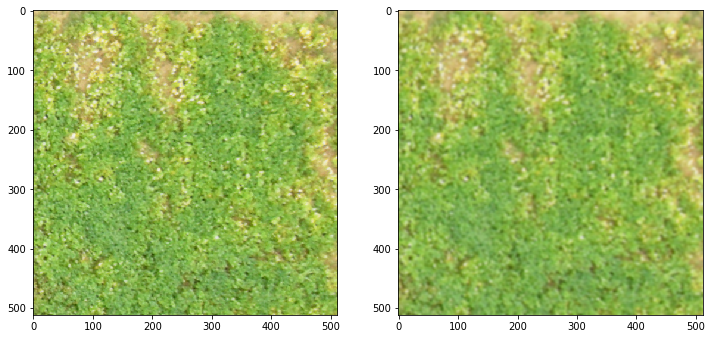

In [50]:
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.imshow(pic)

plt.subplot(1, 2, 2)
plt.imshow(out)

In [51]:
from skimage.util.shape import view_as_blocks

In [52]:
rotations = [
    (0, 0),
    (1, 15),
    (2, 30),
    (3, 45),
]

shifts = [
    (0, 0, 0),
    (1, 0, 1),
    (2, 1, 0),
    (3, 1, 1),
]

noises = [
    (0, 'None'),
    (1, 'Blur')
]

n = 9
kernel_blur = np.zeros((n, n), int)
kernel_blur[n // 2, :] = 1
kernel_blur = kernel_blur / kernel_blur.sum()

In [53]:
def transform_img(img, noise, rotation, shift):
    
    noise_num, noise_val = noise
    rot_num, rot_val = rotation
    sh_num, sh_val_v, sh_val_h = shift
    
    if len(img.shape) == 3:
        if noise_val == 'Blur':
            for c in range(3):
                img[:,:,c] = convolve2d(img[:,:,c], kernel_blur, mode = 'same', boundary = 'symm')

        if rot_num != 0:
            img = np.pad(img, ((256, 256), (256, 256), (0, 0)), mode = 'reflect')
            img = rotate(img, rot_val, reshape = False)
            img = img[150 + 2 : 150 + 724 - 2, 150 + 2 : 150 + 724 - 2]
    else:
        if rot_num != 0:
            img = np.pad(img, ((256, 256), (256, 256)), mode = 'reflect')
            img = rotate(img, rot_val, reshape = False)
            img = img[150 + 2 : 150 + 724 - 2, 150 + 2 : 150 + 724 - 2]
            
    if sh_val_v == 1:
        img = img[8 : img.shape[0] - 8, :]
    if sh_val_h == 1:
        img = img[:, 8 : img.shape[1] - 8]
        
    return img.copy()

In [71]:
i = 27
pic = imread(paths['pic'].iloc[i], False)[:, :, : 3]
gt = imread(paths['gt'].iloc[i], as_gray=True) # all valid images when read like this have a max value of 1.0

In [72]:
gt.shape, gt.dtype, np.unique(gt)

((512, 512),
 dtype('float64'),
 array([0.        , 0.60784314, 0.61568627, 0.61960784, 0.63921569,
        0.65490196, 0.66666667, 0.67843137, 0.70980392, 0.72156863,
        0.72941176, 0.73333333, 0.7372549 , 0.74117647, 0.74509804,
        0.74901961, 0.75294118, 0.75686275, 0.76078431, 0.76862745,
        0.77647059, 0.78431373, 0.79215686, 0.79607843, 0.81960784,
        0.82352941, 0.82745098, 0.83137255, 0.83921569, 0.84313725,
        0.84705882, 1.        ]))

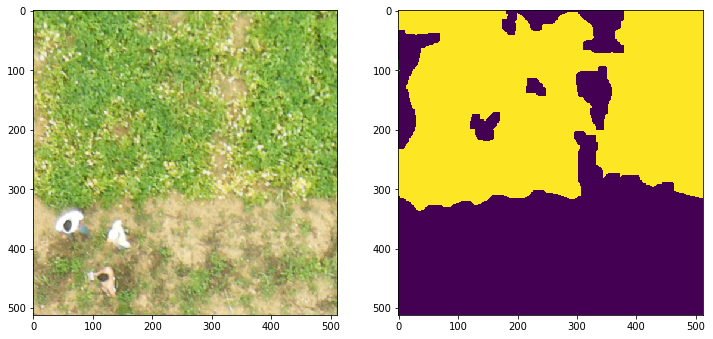

In [73]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(pic)
plt.subplot(1, 2, 2)
plt.imshow(gt)
plt.savefig('example_original.pdf', format = 'pdf')

In [64]:
for noise in noises[-1:]:
    for rotation in rotations[-1:]:
        for shift in shifts[-1:]:
            pic = transform_img(pic.copy(), noise, rotation, shift)
            gt =  transform_img(gt.copy(), noise, rotation, shift)

In [68]:
gt.shape, gt.dtype, np.unique(gt)

((704, 704),
 dtype('float64'),
 array([0.        , 0.00290067, 0.00389647, ..., 0.98722484, 0.98773502,
        1.        ]))

In [66]:
gt = gt - gt.min()
gt = gt / gt.max()

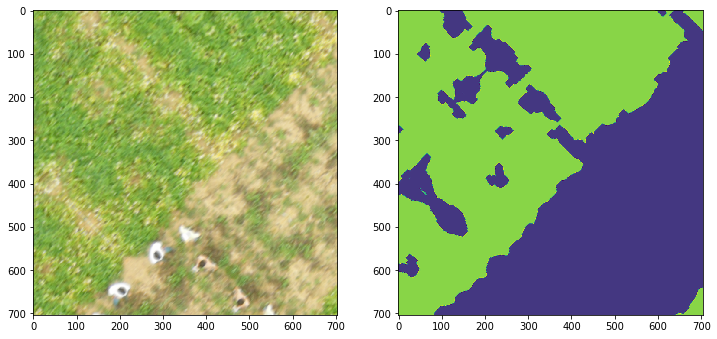

In [70]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(pic)
plt.subplot(1, 2, 2)
plt.imshow(gt)
plt.savefig('example_modified.pdf', format = 'pdf')

In [270]:
n = len(gt) // 16
blocks = view_as_blocks(gt, (16,16)).reshape((n * n, 16, 16))

In [287]:
i = 27
pic = imread(paths['pic'].iloc[i], False)[:, :, : 3]
gt = imread(paths['gt'].iloc[i], as_gray=True) # all valid images when read like this have a max value of 1.0

In [288]:
%%time
c = 0
for noise in noises:
    for rotation in rotations:
        for shift in shifts:
            pic = transform_img(pic.copy(), noise, rotation, shift)
            gt =  transform_img(gt.copy(), noise, rotation, shift)
            
            v = gt.shape[0] // 16
            h = gt.shape[1] // 16
            blocks = view_as_blocks(gt, (16,16)).reshape((v * h, 16, 16))
            c += len(blocks)
            
print(c)

58844
CPU times: user 32.7 s, sys: 186 ms, total: 32.9 s
Wall time: 16.3 s


In [290]:
from sklearn.preprocessing import minmax_scale as mms

In [291]:
%%time
v = gt.shape[0] // 16
h = gt.shape[1] // 16
    
B, G, R = [np.float32(pic[:, :, c]) for c in range(3)]
r = R / (R + G + B)
g = G / (R + G + B)
b = B / (R + G + B)


#VI generation
F = {} # Imagens Filtradas
F["ExG"] = 2 * g - r - b
#print("ExGR")
F["ExGR"] = F["ExG"] - 1.4 * r - g
#print("CIVE")
F["CIVE"] = 0.441 * r - 0.881 * g + 0.385 * b + 18.78745
#print("VEG")
F["VEG"] = g / (2 + r ** 0.667 * b ** (1 - 0.667))
#print("WI")
F["WI"] = (g - b) / (r - g + 255) # MODIFICADO
#print("NGRDI")
F["NGRDI"] = (G/2 - R/2) / (G/2 + R/2) # Divide por dois pra evitar overflow            

N = {f : np.array(mms(F[f], (0.5,7.5)) , dtype="uint8") for f in F} # Imagens filtradas Normalizadas


#Haralick
for f in F:
    blocks = view_as_blocks(N[f], (16,16)).reshape((v * h, 16, 16))
    for j, b in enumerate(blocks):
        # b = np.array(mms(b, (0.5,7.5)) , dtype="uint8") # normaliza apenas o bloco
        P = greycomatrix(b, [1], (np.pi/4, 0, 3*np.pi/2, 7*np.pi/4), 8)
#         VI[f][offset + j, :24] = get_features(P)
        aa = get_features(P)

#"STATS"
for f in F:
    blocks = view_as_blocks(F[f], (16,16)).reshape((v * h, 16, 16))
    for j, b in enumerate(blocks):
#         VI[f][offset + j, 24:] = get_stats(b)
        bb = get_stats(b)


#BIC
bic_pic = sum(normalize(np.float32(pic[:, :, c]), 0, 3) * (4**c) for c in range(3)) # normalize dá erro sem float32
blocks = view_as_blocks(bic_pic, (16,16)).reshape((v * h, 16, 16))
for j, b in enumerate(blocks):
#     bic[offset + j, 0:64], bic[b, 64:64*2] = BIC(b, 64)
    cc = BIC(b, 64)

/store/tveiga/miniconda3/envs/py/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """
/store/tveiga/miniconda3/envs/py/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """
/store/tveiga/miniconda3/envs/py/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  
/store/tveiga/miniconda3/envs/py/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  
/store/tveiga/miniconda3/envs/py/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys
/store/tveiga/miniconda3/envs/py/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys
/store/tveiga/miniconda3/envs/py/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeW

NameError: name 'greycomatrix' is not defined